# Generate No Half-Circle Images

These images will serve as the label 0 images.

In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import sys
import random
import requests
import cv2
from PIL import Image
from tqdm.notebook import tqdm

sys.path.append('..')

from src.data.generate import IMG_SHAPE, generate_half_circle_image, \
    generate_filled_image, generate_noise_image, generate_picsum_image, \
    generate_from_random_crop_pdf

In [198]:
DATASET_SYNTHETIC_CONFIG = {
    'base_hc': 2000,
    'pdfcrop_hc': 5000,
    'noise': 250,
    'filled': 250,
    'picsum': 1250,
    'pdfcrop': 5000
}

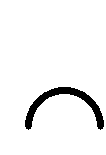

In [191]:
delta = 0.3
height, width = IMG_SHAPE
height = random.randint(int(height * (1 - delta)), int(height * (1 + delta)))
width = random.randint(int(width * (1 - delta)), int(width * (1 + delta)))
img = generate_half_circle_image(height=height, width=width)
Image.fromarray(img)

In [ ]:
is_generate_images_enabled = 0
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['base_hc'])):
        # generate random half circle images of different dimensions
        # we want to randomize the dimension of the image too
        delta = 0.3
        height, width = IMG_SHAPE
        height = random.randint(int(height * (1 - delta)), int(height * (1 + delta)))
        width = random.randint(int(width * (1 - delta)), int(width * (1 + delta)))
        img = generate_half_circle_image(height=height, width=width)
        Image.fromarray(img).save(f'../data/hc/base/halfcircle_{i}.png')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
is_generate_images_enabled = 0
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['filled'])):
        fill_value = random.randint(0, 255)
        img = generate_filled_image(height=IMG_SHAPE[0], width=IMG_SHAPE[1], fill_value=fill_value)
        Image.fromarray(img).save(f'../data/other/pure_fill/pure_fill_{i}.png')

  0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
is_generate_images_enabled = 0
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['noise'])):
        img = generate_noise_image(height=IMG_SHAPE[0], width=IMG_SHAPE[1])
        Image.fromarray(img).save(f'../data/other/pure_noise/pure_noise_{i}.png')

  0%|          | 0/250 [00:00<?, ?it/s]

In [ ]:
is_generate_images_enabled = 0
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['picsum'])):
        height = random.randint(64, 256)
        width = random.randint(64, 256)
        generate_picsum_image(
            height=height, 
            width=width,
            save_filepath=f'../data/other/picsum/picsum_{i}.png'
        )

In [202]:
base_filepath = "/Users/alexandrepoupeau/Documents/work/code/perso/aitt/data/raw/el_origen/input/LOTE {}.pdf"

is_generate_images_enabled = True
if is_generate_images_enabled:
    n_images = DATASET_SYNTHETIC_CONFIG['pdfcrop']
    for i in tqdm(range(n_images)):
        is_image_valid = False
        while not is_image_valid:
            _id = random.randint(1, 90)
            img = generate_from_random_crop_pdf(
                filepath_or_stream=base_filepath.format(_id),
                page_nb=0,
                crop_width_pct=0.02,
                crop_height_pct=0.015
            )
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            # print(img.shape)
            thresh = 128
            pct_black_pixels = 0.1
            n_black_pixels = int((img < thresh).sum())
            n_pixels = img.shape[0] * img.shape[1]
            if n_black_pixels > n_pixels * pct_black_pixels:
                is_image_valid = True
    
        img = Image.fromarray(img)
        img.save(f'../data/other/pdfcrop/pdfcrop_{i}.png')

  0%|          | 0/5000 [00:00<?, ?it/s]

In [194]:
base_filepath = "/Users/alexandrepoupeau/Documents/work/code/perso/aitt/data/raw/el_origen/input/LOTE {}.pdf"

is_generate_images_enabled = True
if is_generate_images_enabled:
    n_images = DATASET_SYNTHETIC_CONFIG['pdfcrop_hc']
    for i in tqdm(range(n_images)):
        is_image_valid = False
        while not is_image_valid:
            _id = random.randint(1, 90)
            img = generate_from_random_crop_pdf(
                filepath_or_stream=base_filepath.format(_id),
                page_nb=0,
                crop_width_pct=0.02,
                crop_height_pct=0.015
            )
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            # print(img.shape)
            thresh = 128
            pct_black_pixels = 0.1
            n_black_pixels = int((img < thresh).sum())
            n_pixels = img.shape[0] * img.shape[1]
            if n_black_pixels > n_pixels * pct_black_pixels:
                is_image_valid = True

        img = generate_half_circle_image(
            image=img, 
            min_thickness=15,
            max_thickness=25,
            added_thickness_cleaning_image=150
        )
    
        img = Image.fromarray(img)
        img.save(f'../data/hc/pdfcrop/pdfcrop_{i}.png')

  0%|          | 0/5000 [00:00<?, ?it/s]